In [78]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.datasets import load_iris

In [38]:
# Load the Excel file with all sheets into a dictionary of DataFrames
file_path = r'C:\Users\akhil\Desktop\Research\BoxingTestNormalized.xlsx'
  # Replace with your file path
all_data = pd.read_excel(file_path, sheet_name=None, header=None)

# Now all_data is a dictionary where keys are sheet names and values are DataFrames
# Access each DataFrame by the sheet name or iterate through the dictionary

# To access a specific sheet, for example, 'Sheet1':
sheet1_data = all_data['Sheet1'] 

all_data

{'Sheet1':               0         1         2         3
 0      0.000000  1.009188  1.018593  1.008534
 1      0.014553  1.011769  1.018593  1.008534
 2      0.029107  0.990053  0.995588  0.984369
 3      0.043660  0.997661  0.987139  0.982654
 4      0.058214  1.002767  1.007003  0.998143
 ...         ...       ...       ...       ...
 1668  24.275120  0.983759  0.978784  0.980940
 1669  24.289673  0.982506  1.021519  0.996416
 1670  24.304226  0.982506  0.966426  0.992967
 1671  24.318780  1.002767  0.994173  0.996416
 1672  24.333333  1.001488  0.989945  1.003332
 
 [1673 rows x 4 columns],
 'Sheet2':               0         1         2         3
 0      0.000000  0.985120  0.983158  0.984356
 1      0.015210  1.024843  1.019558  1.003335
 2      0.030420  1.001578  0.998348  0.998141
 3      0.045630  0.991416  0.984526  0.991237
 4      0.060839  1.005417  0.988647  0.994686
 ...         ...       ...       ...       ...
 1206  18.343096  0.962792  0.738689  0.992961
 1207  18.35

In [39]:
# To iterate through all sheets and print basic information:
for sheet_name, data in all_data.items():
    print(f"Sheet Name: {sheet_name}")
    print(data.head())  # Display the first few rows of each sheet


Sheet Name: Sheet1
          0         1         2         3
0  0.000000  1.009188  1.018593  1.008534
1  0.014553  1.011769  1.018593  1.008534
2  0.029107  0.990053  0.995588  0.984369
3  0.043660  0.997661  0.987139  0.982654
4  0.058214  1.002767  1.007003  0.998143
Sheet Name: Sheet2
          0         1         2         3
0  0.000000  0.985120  0.983158  0.984356
1  0.015210  1.024843  1.019558  1.003335
2  0.030420  1.001578  0.998348  0.998141
3  0.045630  0.991416  0.984526  0.991237
4  0.060839  1.005417  0.988647  0.994686
Sheet Name: Sheet3
          0         1         2         3
0  0.000000  0.989170  1.002897  0.995021
1  0.015649  1.000564  0.995073  0.991567
2  0.031299  1.001838  1.013440  1.008893
3  0.046948  0.999291  1.025456  1.003680
4  0.062598  1.003114  1.029498  1.005417
Sheet Name: Sheet4
          0         1         2         3
0  0.000000  0.997746  1.008353  1.004889
1  0.016153  0.991408  1.008353  1.003155
2  0.032307  0.995205  1.005729  1.006624


In [40]:
all_data['Sheet1'].head()

,0,1,2,3
0,0.000000,1.009188,1.018593,1.008534
1,0.014553,1.011769,1.018593,1.008534
2,0.029107,0.990053,0.995588,0.984369
3,0.043660,0.997661,0.987139,0.982654
4,0.058214,1.002767,1.007003,0.998143


In [41]:
for sheet_name,data in all_data.items():
    all_data[sheet_name].columns = ['time','Anterior','Posterior','Triceps']

In [42]:
all_data['Sheet1'].head()

,time,Anterior,Posterior,Triceps
0,0.000000,1.009188,1.018593,1.008534
1,0.014553,1.011769,1.018593,1.008534
2,0.029107,0.990053,0.995588,0.984369
3,0.043660,0.997661,0.987139,0.982654
4,0.058214,1.002767,1.007003,0.998143


In [43]:
import matplotlib.pyplot as plt

In [44]:
dict=  { 'Sheet1': 'Baseline',
        'Sheet2' : 'Jabs',
        'Sheet3': 'Side',
        'Sheet4': 'Up',
        'Sheet5': 'Baseline',
        'Sheet6': 'Jabs',
        'Sheet7': 'Side',
        'Sheet8': 'Up',
        'Sheet9': 'Baseline',
       'Sheet10': 'Jabs',
        'Sheet11': 'Side',
        'Sheet12': 'Up',
        'Sheet13': 'Baseline',
        'Sheet14': 'Jabs',
        'Sheet15': 'Side',
        'Sheet16': 'Up',
        'Sheet17': 'Baseline',
        'Sheet18': 'Jabs',
        'Sheet19': 'Side',
        'Sheet20': 'Up',
        'Sheet21': 'Baseline w/ Power',
        'Sheet22': 'Jabs',
       'Sheet23': 'Side',
        'Sheet24': 'Up',
        'Sheet25': 'Baseline w/ weights',
        'Sheet26': 'Jabs',
        'Sheet27': 'Side',
        'Sheet28': 'Up'}


In [45]:
for sheet_name,data in all_data.items():
    all_data[sheet_name]['Anterior']=(all_data[sheet_name]['Anterior']-1)
    all_data[sheet_name]['Posterior']=(all_data[sheet_name]['Posterior']-1)
    all_data[sheet_name]['Triceps']=(all_data[sheet_name]['Triceps']-1)

In [46]:
for sheet_name,data in all_data.items():
    all_data[sheet_name]['Motion'] = dict[sheet_name]

In [47]:
all_data['Sheet3'].columns

Index(['time', 'Anterior', 'Posterior', 'Triceps', 'Motion'], dtype='object')

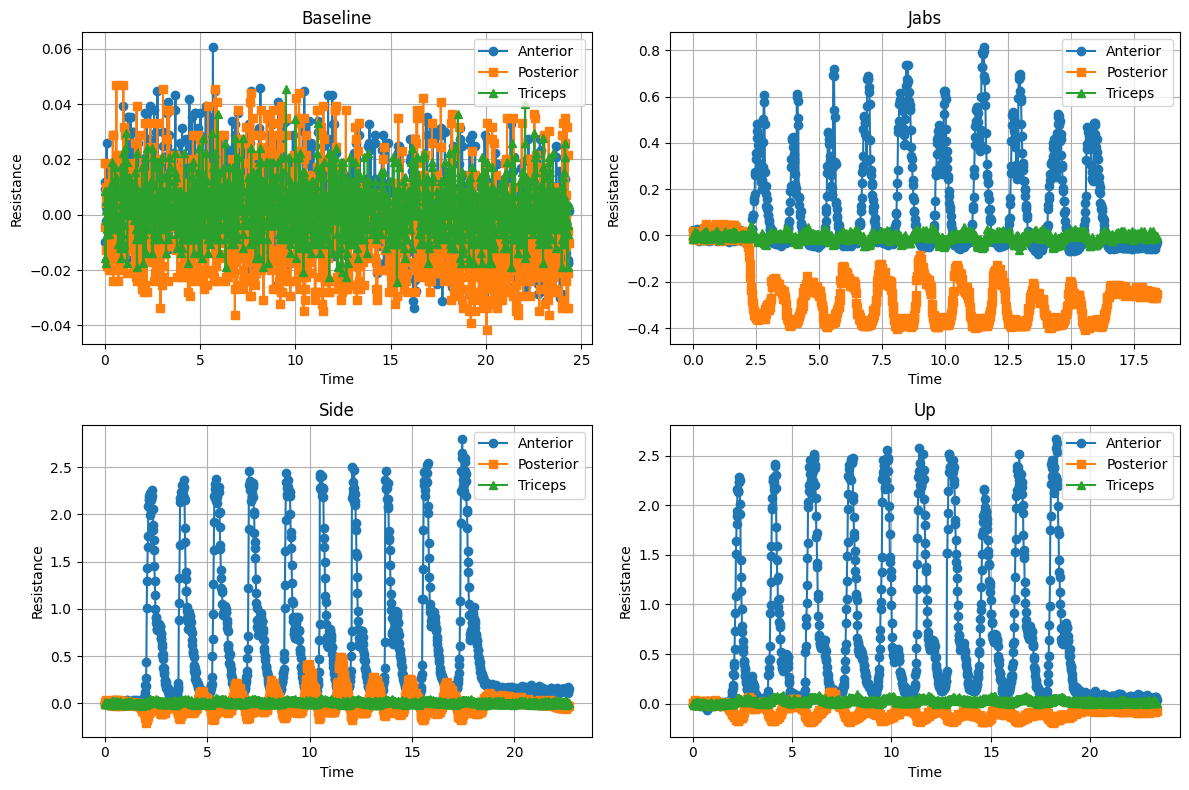

In [48]:
import matplotlib.pyplot as plt

# This function will plot a single sheet
def plot_sheet(sheet, subplot_position, sheet_name):
    plt.subplot(subplot_position)
    plt.plot(sheet['time'], sheet['Anterior'], label='Anterior', marker='o')
    plt.plot(sheet['time'], sheet['Posterior'], label='Posterior', marker='s')
    plt.plot(sheet['time'], sheet['Triceps'], label='Triceps', marker='^')
    plt.xlabel('Time')
    plt.ylabel('Resistance')
    plt.title(sheet_name)
    plt.legend()
    plt.grid(True)

# Create a 2x2 grid of plots
plt.figure(figsize=(12, 8))
plot_sheet(all_data['Sheet1'], 221, 'Baseline')
plot_sheet(all_data['Sheet2'], 222, 'Jabs')
plot_sheet(all_data['Sheet3'], 223, 'Side')
plot_sheet(all_data['Sheet4'], 224, 'Up')


plt.tight_layout()
plt.show()


In [49]:
#Concat 1 to 4 as they belong to same baseline
Test1_4=pd.concat([all_data['Sheet1'],all_data['Sheet2'],all_data['Sheet3'],all_data['Sheet4']],axis=0).reset_index(drop=True)
Test5_8=pd.concat([all_data['Sheet5'],all_data['Sheet6'],all_data['Sheet7'],all_data['Sheet8']],axis=0).reset_index(drop=True)
Test9_12=pd.concat([all_data['Sheet9'],all_data['Sheet10'],all_data['Sheet11'],all_data['Sheet12']],axis=0).reset_index(drop=True)
Test13_16=pd.concat([all_data['Sheet13'],all_data['Sheet14'],all_data['Sheet15'],all_data['Sheet16']],axis=0).reset_index(drop=True)
Test17_20=pd.concat([all_data['Sheet17'],all_data['Sheet18'],all_data['Sheet19'],all_data['Sheet20']],axis=0).reset_index(drop=True)
Test21_24=pd.concat([all_data['Sheet21'],all_data['Sheet22'],all_data['Sheet23'],all_data['Sheet24']],axis=0).reset_index(drop=True)
Test25_28=pd.concat([all_data['Sheet25'],all_data['Sheet26'],all_data['Sheet27'],all_data['Sheet28']],axis=0).reset_index(drop=True)

In [50]:
Test1_4['Test_number_for_each_class']=1
Test5_8['Test_number_for_each_class']=2
Test9_12['Test_number_for_each_class']=3
Test13_16['Test_number_for_each_class']=4
Test17_20['Test_number_for_each_class']=5
Test21_24['Test_number_for_each_class']=6
Test25_28['Test_number_for_each_class']=7


In [51]:
total_data=pd.concat([Test1_4,Test5_8,Test9_12,Test13_16,Test17_20,Test21_24,Test25_28],axis=0).reset_index(drop=True)

In [52]:
total_data

,time,Anterior,Posterior,Triceps,Motion,Test_number_for_each_class
0,0.000000,0.009188,0.018593,0.008534,Baseline,1
1,0.014553,0.011769,0.018593,0.008534,Baseline,1
2,0.029107,-0.009947,-0.004412,-0.015631,Baseline,1
3,0.043660,-0.002339,-0.012861,-0.017346,Baseline,1
4,0.058214,0.002767,0.007003,-0.001857,Baseline,1
...,...,...,...,...,...,...
39697,21.142610,0.004672,-0.297967,-0.368757,Up,7
39698,21.157594,0.017791,-0.297967,-0.032006,Up,7
39699,21.172578,0.009896,-0.296119,-0.235422,Up,7
39700,21.187562,0.008588,-0.297967,-0.339924,Up,7


In [53]:
df=total_data[(total_data['Motion'] == 'Jabs') | (total_data['Motion'] == 'Side') | (total_data['Motion'] == 'Up')]

In [54]:
df

,time,Anterior,Posterior,Triceps,Motion,Test_number_for_each_class
1673,0.000000,-0.014880,-0.016842,-0.015644,Jabs,1
1674,0.015210,0.024843,0.019558,0.003335,Jabs,1
1675,0.030420,0.001578,-0.001652,-0.001859,Jabs,1
1676,0.045630,-0.008584,-0.015474,-0.008763,Jabs,1
1677,0.060839,0.005417,-0.011353,-0.005314,Jabs,1
...,...,...,...,...,...,...
39697,21.142610,0.004672,-0.297967,-0.368757,Up,7
39698,21.157594,0.017791,-0.297967,-0.032006,Up,7
39699,21.172578,0.009896,-0.296119,-0.235422,Up,7
39700,21.187562,0.008588,-0.297967,-0.339924,Up,7


In [55]:
df.reset_index(drop=True,inplace=True)

In [56]:
df.describe()

,time,Anterior,Posterior,Triceps,Test_number_for_each_class
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000
mean,10.356432,0.560875,-0.057512,3.325643,3.972072
std,6.084030,0.831796,0.171174,31.132334,1.990802
min,0.000000,-1.000000,-0.453567,-4.396565,1.000000
25%,5.130183,0.038000,-0.159383,-0.001801,2.000000
50%,10.269823,0.168087,-0.077060,0.012376,4.000000
75%,15.408475,0.716476,0.013845,0.033876,6.000000
max,24.034722,4.140642,0.748905,1026.540296,7.000000


In [57]:
df.isna().sum()

time                          0
Anterior                      0
Posterior                     0
Triceps                       0
Motion                        0
Test_number_for_each_class    0
dtype: int64

In [58]:
df.columns

Index(['time', 'Anterior', 'Posterior', 'Triceps', 'Motion',
       'Test_number_for_each_class'],
      dtype='object')

In [59]:
# Define the mapping
class_mapping = {'Jabs': 0, 'Side': 1, 'Up': 2}

# Map the 'column' using the dictionary
df['Motion'] = df['Motion'].map(class_mapping)

C:\Users\akhil\AppData\Local\Temp\ipykernel_4744\1421255059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Motion'] = df['Motion'].map(class_mapping)


In [60]:
df

,time,Anterior,Posterior,Triceps,Motion,Test_number_for_each_class
0,0.000000,-0.014880,-0.016842,-0.015644,0,1
1,0.015210,0.024843,0.019558,0.003335,0,1
2,0.030420,0.001578,-0.001652,-0.001859,0,1
3,0.045630,-0.008584,-0.015474,-0.008763,0,1
4,0.060839,0.005417,-0.011353,-0.005314,0,1
...,...,...,...,...,...,...
27745,21.142610,0.004672,-0.297967,-0.368757,2,7
27746,21.157594,0.017791,-0.297967,-0.032006,2,7
27747,21.172578,0.009896,-0.296119,-0.235422,2,7
27748,21.187562,0.008588,-0.297967,-0.339924,2,7


In [61]:
from scipy.signal import find_peaks

In [62]:
def calculate_x_for_motion(full_df, motion_class, sensor_column='Anterior', sampling_rate=0.1,height=0):
    # Filter out the data for the specified class
    motion_df = full_df[full_df['Motion'] == motion_class]

    # Assuming 'test_id' identifies each test
    test_ids = motion_df['Test_number_for_each_class'].unique()

    # List to store peak intervals from all tests
    all_peak_intervals = []

    for test_id in test_ids:
        # Extract data for one test
        test_data = motion_df[motion_df['Test_number_for_each_class'] == test_id]
        
        # Using specified sensor data for peak detection
        sensor_data = test_data[sensor_column].values
        
        # Detect peaks with parameters tuned for this specific motion
        peaks, _ = find_peaks(sensor_data, height)  # Adjust parameters as needed for each motion
        
        # Calculate the differences between peaks (in terms of number of samples/rows)
        peak_intervals = np.diff(peaks) * sampling_rate  # Convert to time
        
        # Append to the list
        all_peak_intervals.extend(peak_intervals)

    # Calculate the average interval duration
    if all_peak_intervals:
        average_interval = np.mean(all_peak_intervals)
        x = int(round(average_interval / sampling_rate))
    else:
        # Default value or alternative handling if no peaks were detected
        x = None

    return x

# Calculate 'x' for each type of motion
x_jabs = calculate_x_for_motion(df, 0, height=0.4)  # Replace 0 with the actual class label for 'Jabs'
x_side = calculate_x_for_motion(df,1, height=2)  # Replace 1 with the actual class label for 'Side'
x_up = calculate_x_for_motion(df,2, height=2)  # Replace 2 with the actual class label for 'Up'

# Print out the results
print(f"'x' for Jabs: {x_jabs}")
print(f"'x' for Side: {x_side}")
print(f"'x' for Up: {x_up}")


'x' for Jabs: 22
'x' for Side: 22
'x' for Up: 21


In [63]:
def create_segments_with_test_id(df, x=21):
    # List to store segments and their labels
    segments = []
    labels = []
    
    # Assuming 'Motion' is your class label and 'test_id' identifies each test
    for motion in df['Motion'].unique():
        for test_id in df[df['Motion'] == motion]['Test_number_for_each_class'].unique():
            test_df = df[(df['Motion'] == motion) & (df['Test_number_for_each_class'] == test_id)]
            
            # Iterate to create segments of 'x' rows
            for start in range(0, len(test_df), x):
                end = start + x
                segment = test_df.iloc[start:end]
                
                # Check if segment has 'x' rows
                if len(segment) == x:
                    # Exclude 'Motion', 'time', and 'test_id' from segment features
                    segment_data = segment.drop(['Motion', 'time', 'Test_number_for_each_class'], axis=1).values
                    
                    segments.append(segment_data)
                    labels.append(motion)

    # Convert lists to numpy arrays
    segments_array = np.array(segments)
    labels_array = np.array(labels)

    return segments_array, labels_array

# Assuming 'full_df' contains your full dataset with a 'test_id' column
x_value = 21  # uniform segment size
segments, labels = create_segments_with_test_id(df, x=x_value)

# 'segments' now contains the feature segments, and 'labels' contains the corresponding class labels.


In [64]:
segments[0]

array([[-0.0148801 , -0.01684216, -0.01564444],
       [ 0.02484259,  0.01955771,  0.00333512],
       [ 0.00157823, -0.00165175, -0.00185851],
       [-0.0085835 , -0.01547363, -0.00876303],
       [ 0.00541683, -0.01135323, -0.00531367],
       [ 0.01832386,  0.0110041 ,  0.00506925],
       [ 0.00798445,  0.01384486,  0.01724908],
       [ 0.01184876,  0.01384486, -0.00703907],
       [ 0.00798445,  0.01669604,  0.00854188],
       [-0.00224508,  0.01384486, -0.00531367],
       [ 0.00285606, -0.00025576,  0.00506925],
       [-0.0148801 ,  0.01669604,  0.00506925],
       [ 0.02746239,  0.00254384,  0.01028038],
       [-0.01863816, -0.00859389, -0.00703907],
       [ 0.0003021 , -0.00443615,  0.00333512],
       [-0.01362411, -0.01957187, -0.00703907],
       [-0.02486869, -0.00443615, -0.00531367],
       [ 0.01314031, -0.00443615, -0.00531367],
       [-0.00224508, -0.01135323, -0.00531367],
       [-0.00478549, -0.01820824, -0.00531367],
       [ 0.00157823, -0.01135323, -0.001

In [65]:
import numpy as np
import scipy.fftpack

def extract_features(segments):
    features_list = []

    for segment in segments:
        # Statistical features
        means = np.mean(segment, axis=0)
        std_devs = np.std(segment, axis=0)
        variances = np.var(segment, axis=0)
        mins = np.min(segment, axis=0)
        maxs = np.max(segment, axis=0)
        medians = np.median(segment, axis=0)
        
        # Frequency-domain features using FFT
        fft_coeffs = scipy.fftpack.fft(segment, axis=0)
        fft_coeffs_real = np.real(fft_coeffs)
        fft_coeffs_imag = np.imag(fft_coeffs)
        
        # For simplicity, let's compute the mean of the absolute values of the FFT coefficients
        fft_abs_mean = np.mean(np.abs(fft_coeffs), axis=0)
        
        # Combine all features into a single array
        features = np.concatenate([means, std_devs, variances, mins, maxs, medians, fft_abs_mean])
        features_list.append(features)
    
    return np.array(features_list)

# Assuming your segments are stored in a variable named `segments`
features = extract_features(segments)

print("Shape of first feature vector:", features[0].shape)


Shape of first feature vector: (21,)


In [66]:
from sklearn.model_selection import train_test_split

# Assuming `features` is your array of feature vectors and `labels` is your array of labels
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [67]:
X_train.shape


(917, 21)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale X_val using the same scaler as X_train
X_val_scaled = scaler.transform(X_val)

X_test_scaled = scaler.transform(X_test)  # Assuming you have X_test prepared


In [77]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
# Assuming y_val is already prepared
dval = xgb.DMatrix(X_val_scaled, label=y_val)

dtest = xgb.DMatrix(X_test_scaled, label=y_test)  # Assuming you have y_test prepared

# Specify parameters
params = {
    'max_depth': 50,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train))  # Assuming y_train contains your class labels
}

num_round = 100

# Include the validation set for monitoring
eval_set = [(dtrain, 'train'), (dval, 'val')]
bst = xgb.train(params, dtrain, num_round, evals=eval_set, early_stopping_rounds=20)

# The early_stopping_rounds parameter will stop training if the validation metric 
# does not improve for a given number of rounds, helping prevent overfitting.

# Predictions
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")



[0]	train-mlogloss:0.97973	val-mlogloss:1.00921
[1]	train-mlogloss:0.87787	val-mlogloss:0.93609
[2]	train-mlogloss:0.79155	val-mlogloss:0.87290
[3]	train-mlogloss:0.71531	val-mlogloss:0.81816
[4]	train-mlogloss:0.64833	val-mlogloss:0.77037
[5]	train-mlogloss:0.58849	val-mlogloss:0.72937
[6]	train-mlogloss:0.53616	val-mlogloss:0.69206
[7]	train-mlogloss:0.48981	val-mlogloss:0.66048
[8]	train-mlogloss:0.44760	val-mlogloss:0.63246
[9]	train-mlogloss:0.41117	val-mlogloss:0.60959
[10]	train-mlogloss:0.37712	val-mlogloss:0.58608
[11]	train-mlogloss:0.34662	val-mlogloss:0.56625
[12]	train-mlogloss:0.31861	val-mlogloss:0.54802
[13]	train-mlogloss:0.29302	val-mlogloss:0.52953
[14]	train-mlogloss:0.26966	val-mlogloss:0.51276
[15]	train-mlogloss:0.24855	val-mlogloss:0.49808
[16]	train-mlogloss:0.22948	val-mlogloss:0.48485
[17]	train-mlogloss:0.21208	val-mlogloss:0.47067
[18]	train-mlogloss:0.19659	val-mlogloss:0.45787
[19]	train-mlogloss:0.18238	val-mlogloss:0.44712
[20]	train-mlogloss:0.16941	va

In [79]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(np.unique(y_train)))

param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Predict and evaluate
preds = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy with best parameters: {accuracy * 100:.2f}%")


Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8}
Best accuracy found:  0.8757241330047503
Accuracy with best parameters: 86.80%


In [81]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [83]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob', num_class=len(np.unique(y_train)), seed=42)

# Hyperparameters space
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}

# Randomized Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Results
print("Best parameters found:", random_search.best_params_)
print("Best accuracy found:", random_search.best_score_)

# Predict and evaluate with best parameters
preds = random_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy with RandomizedSearchCV: {accuracy * 100:.2f}%")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 1.0}
Best accuracy found: 0.8833458337797779
Accuracy with RandomizedSearchCV: 88.32%
